# Creación y Comparación de Arquitecturas Funcionales en Keras - Taller #3

### **Estudiante:** *Fredy Andres Castaño*
### **Materia:** *Procesamiento Digital de Imagenes*


### Comparación según distintas salidas.

- Se importa TensorFlow, una biblioteca usada para crear y entrenar modelos de inteligencia artificial, y muestra su versión instalada.

In [ ]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.18.0


- Se importa la base de datos Fashion MNIST y se extraen los datos de entrenamiento.

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data() # Carga el dataset Fashion MNIST y lo divide en entrenamiento y prueba
images, labels = train # Separa las imágenes y las etiquetas del conjunto de entrenamiento

- Se imprimen las etiquetas y la forma (dimensiones) de las imágenes.

In [ ]:
import numpy as np # Importa la biblioteca NumPy
print(np.unique(labels)) # Muestra las etiquetas únicas presentes en el conjunto (0 a 9)
print(images.shape) # Muestra la forma (dimensiones) del arreglo de imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


- Se separan las imágenes (X) y las etiquetas (y) de los conjuntos de datos de entrenamiento y prueba, y se normalizan las imágenes dividiendo sus valores entre 255, para que queden en un rango de 0 a 1 (valores flotantes). Esto mejora el rendimiento del modelo al entrenar

In [ ]:
Xtrain, ytrain = train # Se separan las imágenes y etiquetas del conjunto de entrenamiento
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test # Se separan las imágenes y etiquetas del conjunto de prueba
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- Se crea un modelo de arquitectura funcional.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


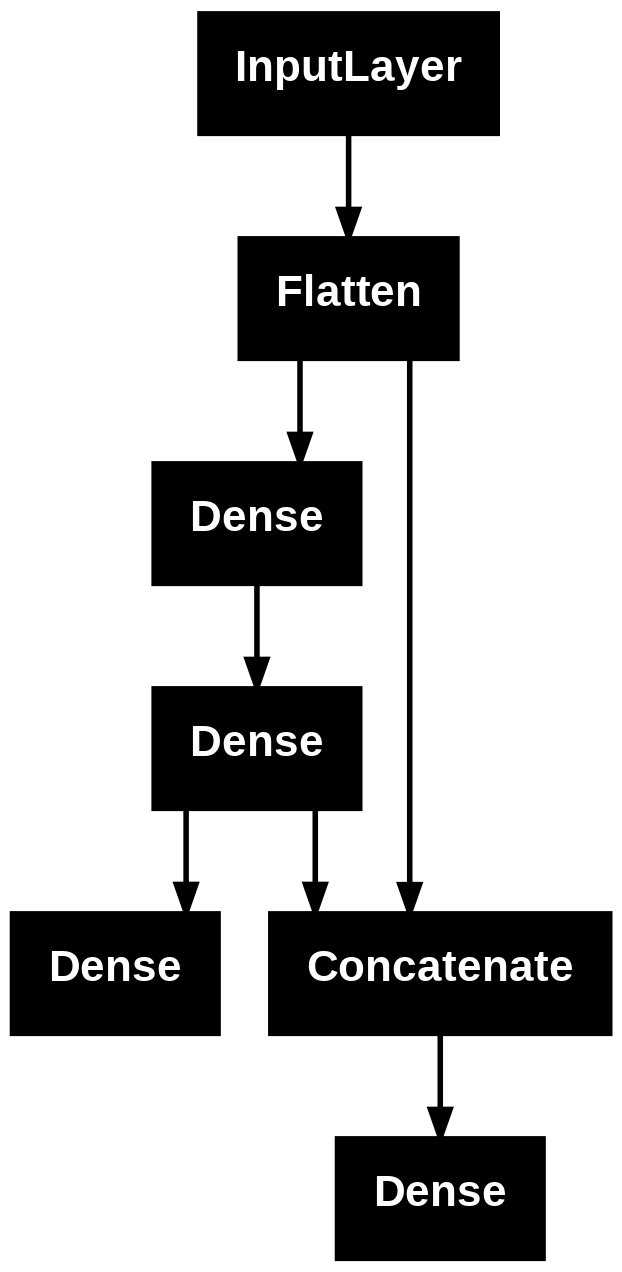

In [ ]:
#arquitectura funcional
tf.keras.backend.clear_session()

input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]), name= 'Flatten')(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

El código configura el modelo para entrenar usando pérdida para clasificación multiclase con etiquetas enteras, optimizador Adam y mide la precisión durante el entrenamiento.

In [ ]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy

- Se entrena el modelo 10 veces con lotes de 64, usando el 30% de los datos para validar.

In [ ]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 1.4709 - outputA_accuracy: 0.7295 - outputA_loss: 0.7899 - outputB_accuracy: 0.7671 - outputB_loss: 0.6811 - val_loss: 0.8508 - val_outputA_accuracy: 0.8421 - val_outputA_loss: 0.4317 - val_outputB_accuracy: 0.8467 - val_outputB_loss: 0.4186
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.8042 - outputA_accuracy: 0.8543 - outputA_loss: 0.4063 - outputB_accuracy: 0.8561 - outputB_loss: 0.3979 - val_loss: 0.8131 - val_outputA_accuracy: 0.8523 - val_outputA_loss: 0.4085 - val_outputB_accuracy: 0.8503 - val_outputB_loss: 0.4036
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.7216 - outputA_accuracy: 0.8704 - outputA_loss: 0.3642 - outputB_accuracy: 0.8723 - outputB_loss: 0.3574 - val_loss: 0.7060 - val_outputA_accuracy: 0.8729 - val_outputA_loss: 0.3544 - val_outputB_accuracy: 0.8744 - val_outputB_loss: 0.3504
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6711 - outputA_accuracy: 0.8743

- Se predice con Xtest dos salidas yestA y yestB, luego imprime sus formas. Son vectores de probabilidades para cada clase.

In [ ]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


- Se muestra la clase predicha (índice del máximo en yestA[0]) y la etiqueta real ytest[0].

In [ ]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


- Se evalúa el modelo con Xtest y etiquetas reales [ytest, ytest], luego imprime la pérdida y métricas

In [ ]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6898 - outputA_accuracy: 0.8771 - outputA_loss: 0.3455 - outputB_accuracy: 0.8803 - outputB_loss: 0.3443
[0.6883662939071655, 0.34556320309638977, 0.342033714056015, 0.8784000277519226, 0.8804000020027161]


- Se crea un modelo nuevo que usa las mismas entradas pero su salida es la capa llamada 'h2'. Luego muestra el esquema del modelo.

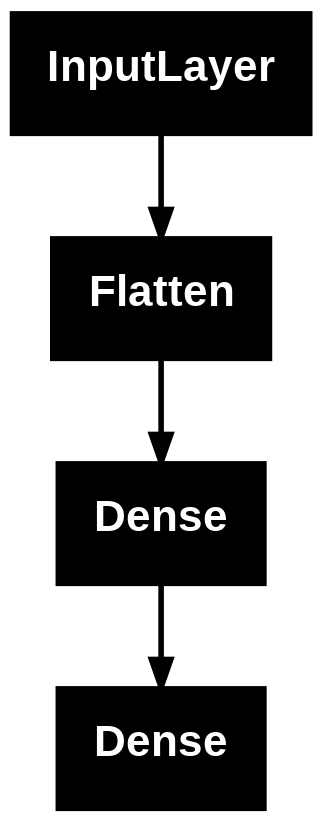

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

- Se calcula y muestra la forma de la salida de la capa 'h2' al aplicar el modelo model_B sobre Xtest.

In [ ]:
z = model_B.predict(Xtest) # salida en h2
z.shape

 84/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


(10000, 50)

- Se aplica PCA para reducir z a 2 dimensiones y muestra su nueva forma.

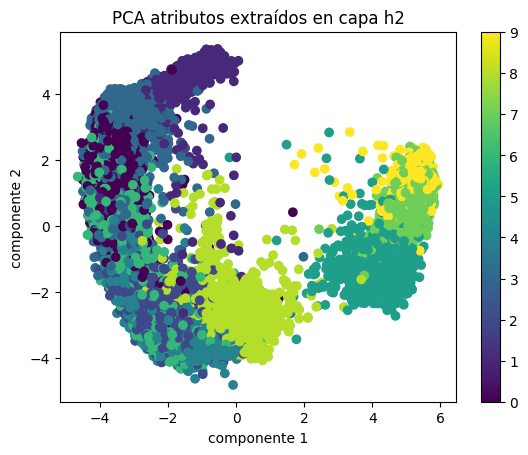

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

- Esta función grafica imágenes MNIST en 2D usando coordenadas Z (como las del PCA), coloreadas con cmap. Cada punto Z[i] se representa con su imagen correspondiente (images[i]) sobre el plano.

In [ ]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- Se selecciona aleatoriamente 4000 muestras del conjunto de prueba y grafica sus imágenes proyectadas en 2D (PCA sobre la capa 'h2'). Añade etiquetas a los ejes y un título.

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

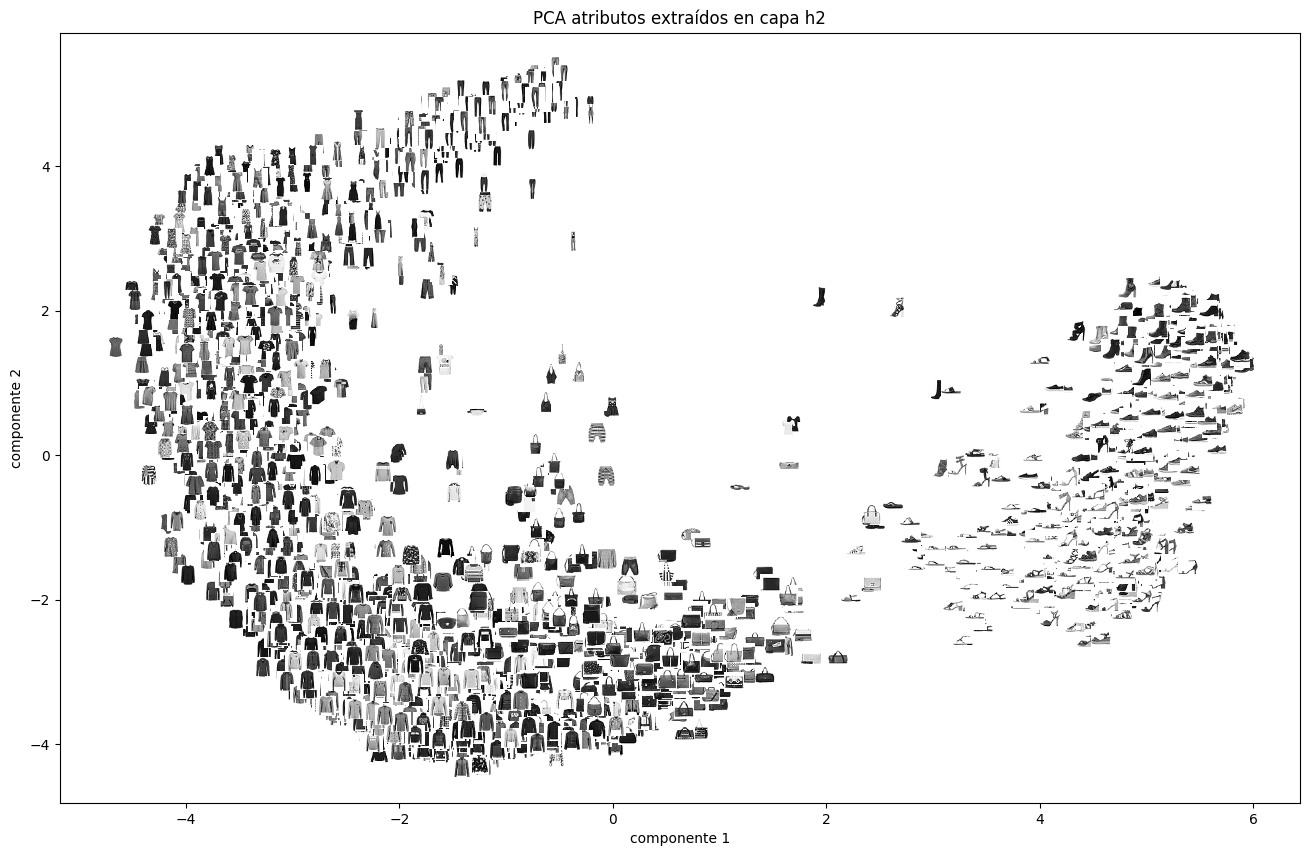

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

- Se realixa el mismo proces o para observar los resultados según cada capa.

- Para la capa Flatten:

144/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


Text(0.5, 1.0, 'PCA atributos extraídos en capa Flatten')

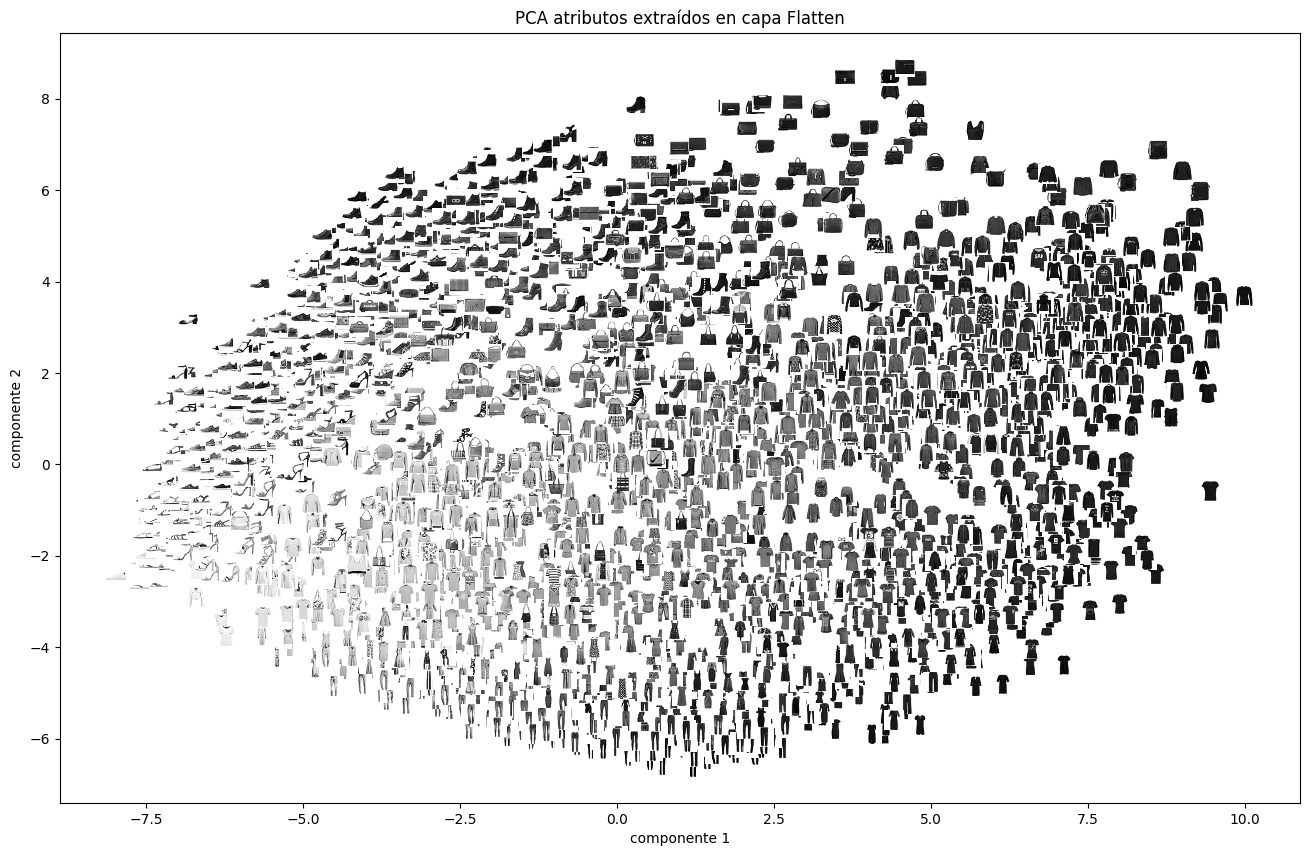

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('Flatten').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

z = model_B.predict(Xtest) # salida en h2
z.shape

zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa Flatten')

La proyección separa las prendas por color (las claras cerca de 0, las oscuras más arriba) y por forma (las alargadas como zapatos y bolsos tienen valores más altos, las más angostas como pantalones más bajos).

- Para la capa h1:

 95/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


Text(0.5, 1.0, 'PCA atributos extraídos en capa h1')

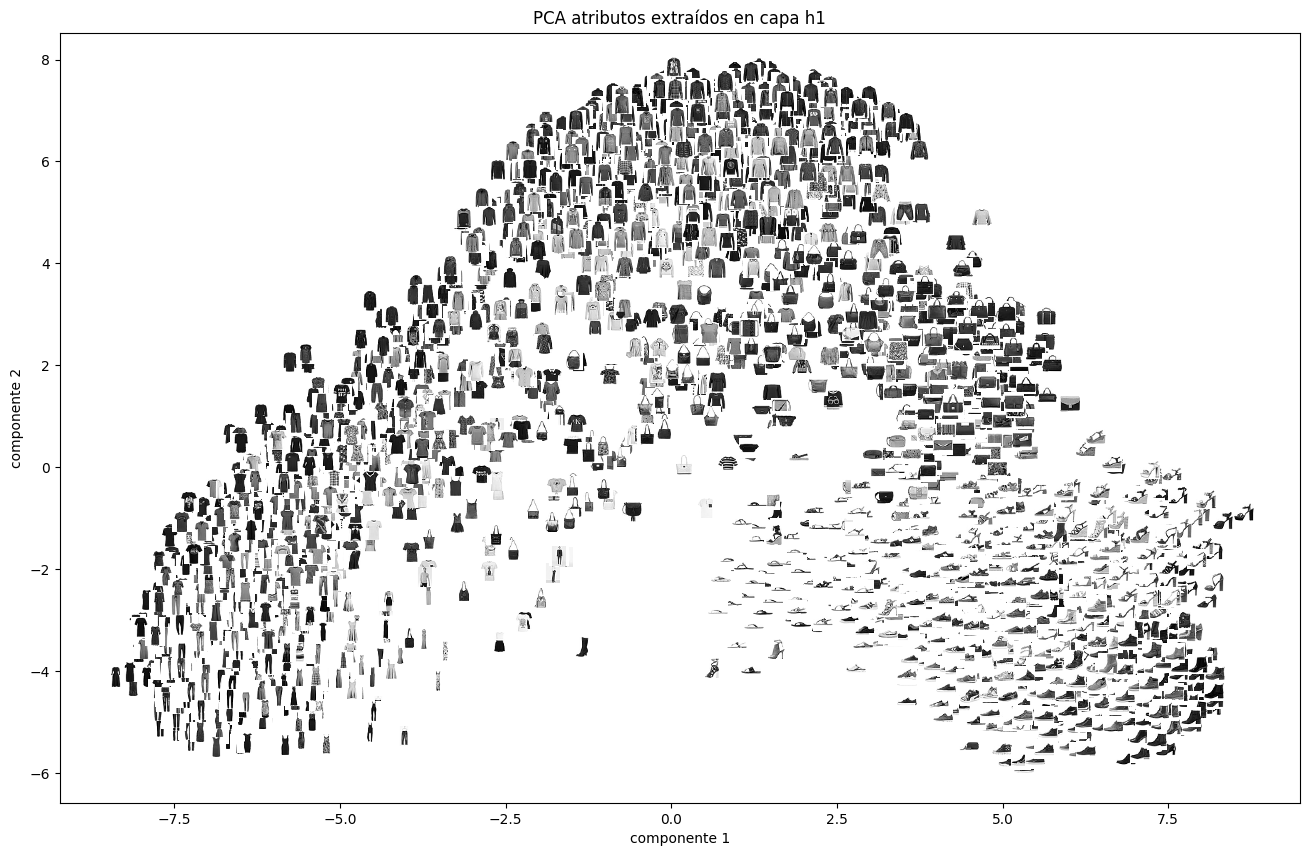

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h1').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

z = model_B.predict(Xtest) # salida en h2
z.shape

zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h1')

Acá la separación se nota aún más: a la izquierda están los zapatos, en el centro los bolsos y a la derecha las prendas de arriba. Los pantalones quedan arriba en la gráfica, con valores altos en la componente 2.

En la capa H1 se ve que las prendas se agrupan según su forma: primero los zapatos, luego los bolsos y al final las prendas de arriba como chaquetas y camisetas. Los pantalones quedan con valores altos en la primera componente y bajos en la segunda.

- Para la capa outputA:

 94/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


Text(0.5, 1.0, 'PCA atributos extraídos en capa outputA')

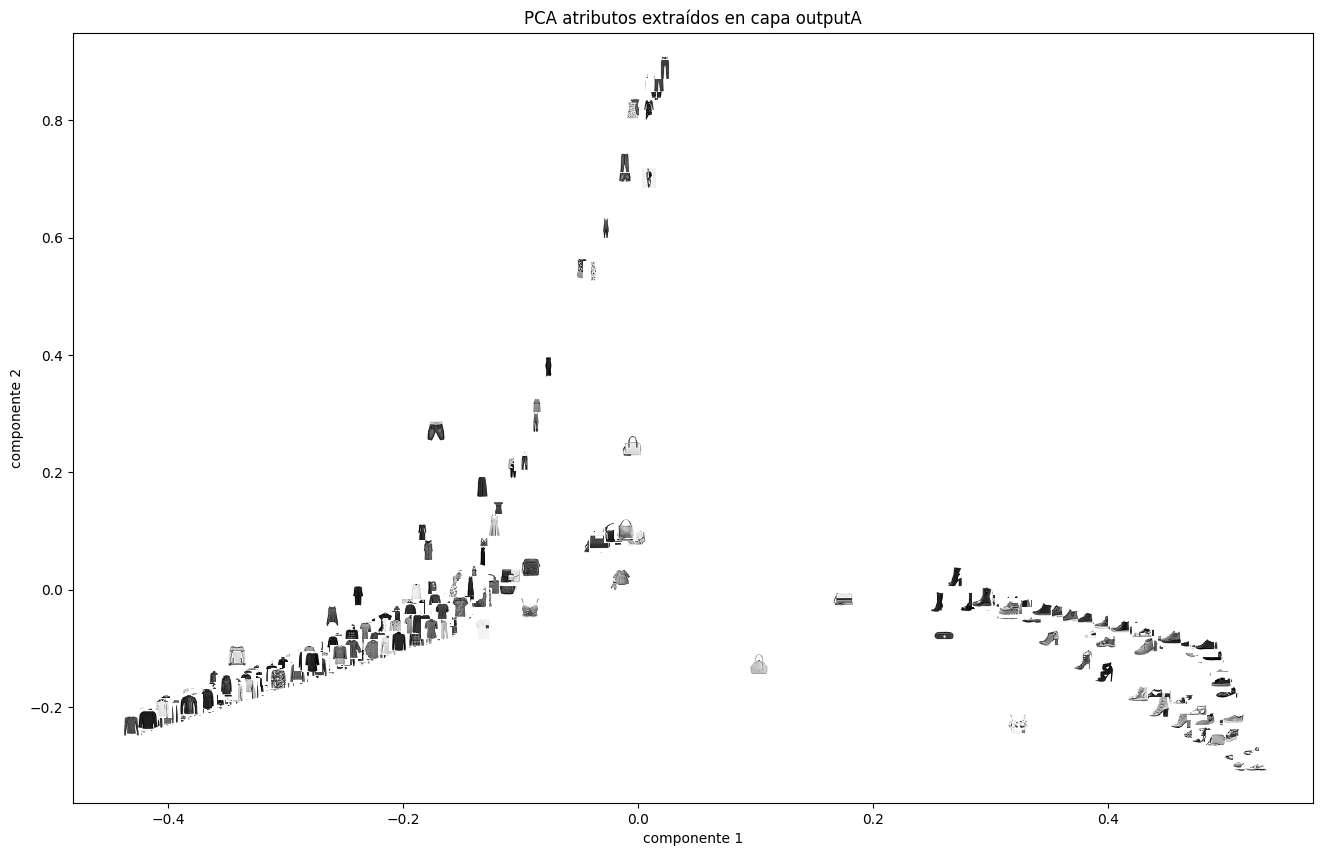

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('outputA').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

z = model_B.predict(Xtest) # salida en h2
z.shape

zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa outputA')

Como en la capa de salida hay menos dimensiones (solo 10) y cada una representa una categoría, el PCA ya no muestra tan bien las separaciones. Aun así, se nota que los zapatos, las prendas de arriba y los pantalones están más o menos separados, aunque los pantalones se mezclan un poco en el centro. Esto pasa porque se reduce mucho la info (de más de 100 dimensiones a 10) y el PCA solo usa líneas rectas, así que no capta bien todo.

- Para la capa outputB:

 84/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


Text(0.5, 1.0, 'PCA atributos extraídos en capa outputB')

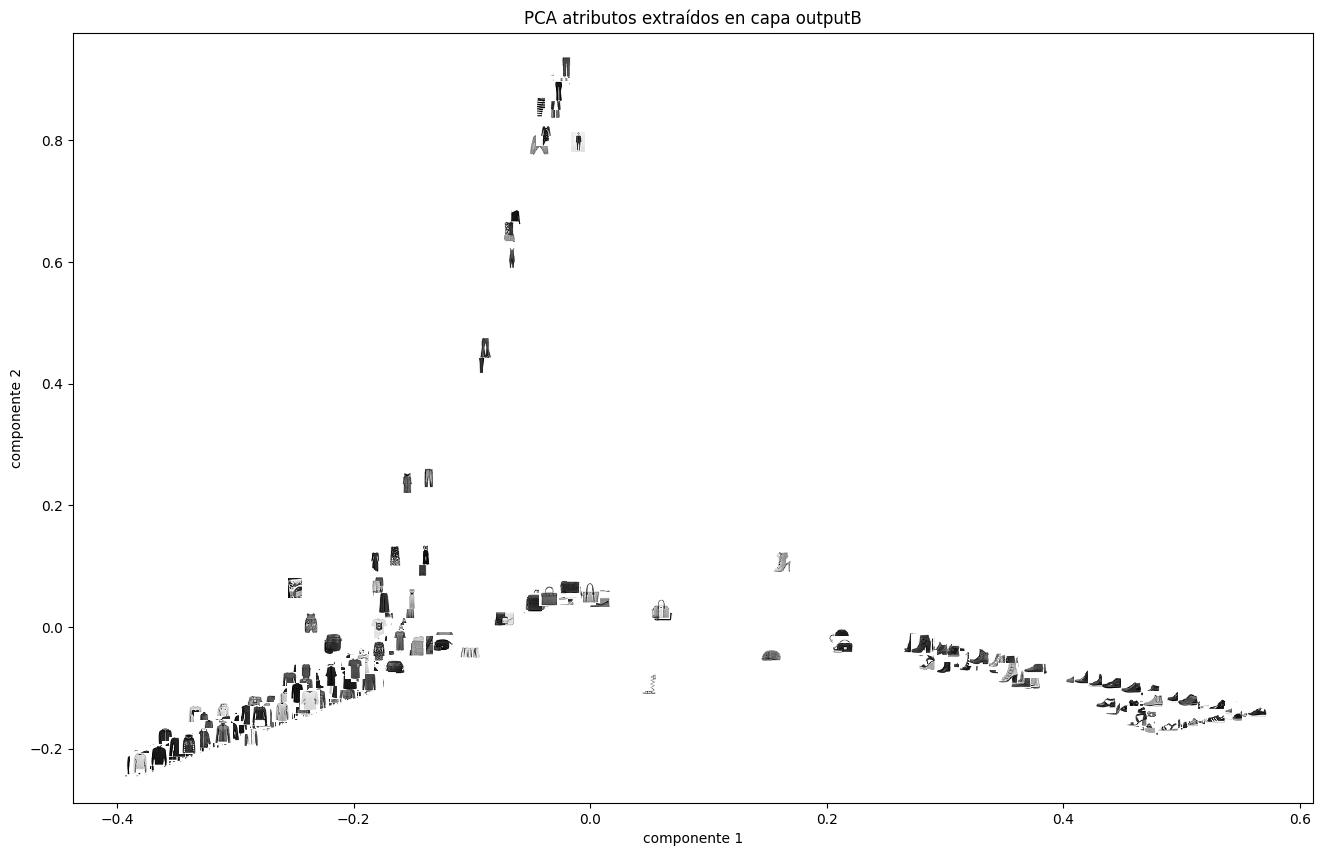

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('outputB').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

z = model_B.predict(Xtest) # salida en h2
z.shape

zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa outputB')

Igual que en la capa anterior, no se ven grupos tan claros porque cada dimensión representa una característica diferente, lo que limita la forma de mostrar los datos. Aun así, se nota que esta gráfica es como un reflejo de la anterior: los pantalones aparecen arriba, las prendas de arriba abajo (en la componente 2) y los zapatos forman una línea inclinada en sentido contrario al gráfico anterior.

### Modelo funcional con MNIST.

- Se carga MNIST y separa validación de entrenamiento (últimos 55,000). Normaliza imágenes a [0,1] y añade canal extra. Imprime formas finales.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[-55000:], X_train[:-55000]
y_train, y_valid = y_train[-55000:], y_train[:-55000]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

(55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


- Se genera versiones con ruido de dos varianzas distintas para train, valid y test, normaliza cada imagen ruidosa a [0,1], y las agrega a listas de entradas. Luego muestra las tres versiones (sin ruido y con ruido) de la primera imagen en una sola fila.

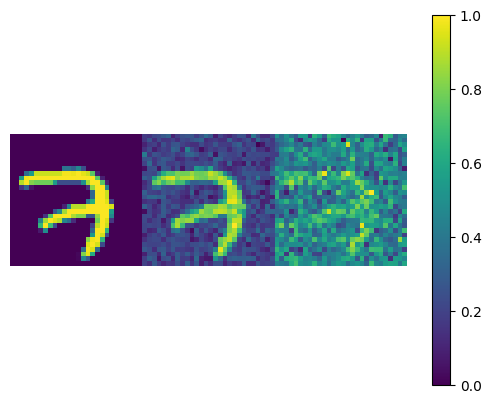

In [ ]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

- Se crea etiquetas binarias que indican si ytrain es par (0) o impar (1), y muestra ejemplos junto con las etiquetas originales.

In [ ]:
#veector de salida par o impar
ytrain_B = (y_train % 2)
print(ytrain_B[:10])
print(y_train[:10])

yvalid_B = (y_valid % 2)
ytest_B = (y_test % 2)

[1 1 0 0 1 0 1 0 1 0]
[7 3 4 6 1 8 1 0 9 8]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada_1           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada_2           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada_3           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ entrada_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ entrada_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ entrada_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1_1 (Dense)        │ (None, 300)       │    235,500 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1_2 (Dense)        │ (None, 100)       │     78,500 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1_3 (Dense)        │ (None, 50)        │     39,250 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2_1 (Dense)        │ (None, 100)       │     30,100 │ h1_1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2_2 (Dense)        │ (None, 50)        │      5,050 │ h1_2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2_3 (Dense)        │ (None, 25)        │      1,275 │ h1_3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 175)       │          0 │ h2_1[0][0],       │
│ (Concatenate)       │                   │            │ h2_2[0][0],       │
│                     │                   │            │ h2_3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_d (Dense)    │ (None, 10)        │      1,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_p (Dense)    │ (None, 1)         │        176 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 391,611 (1.49 MB)

 Trainable params: 391,611 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

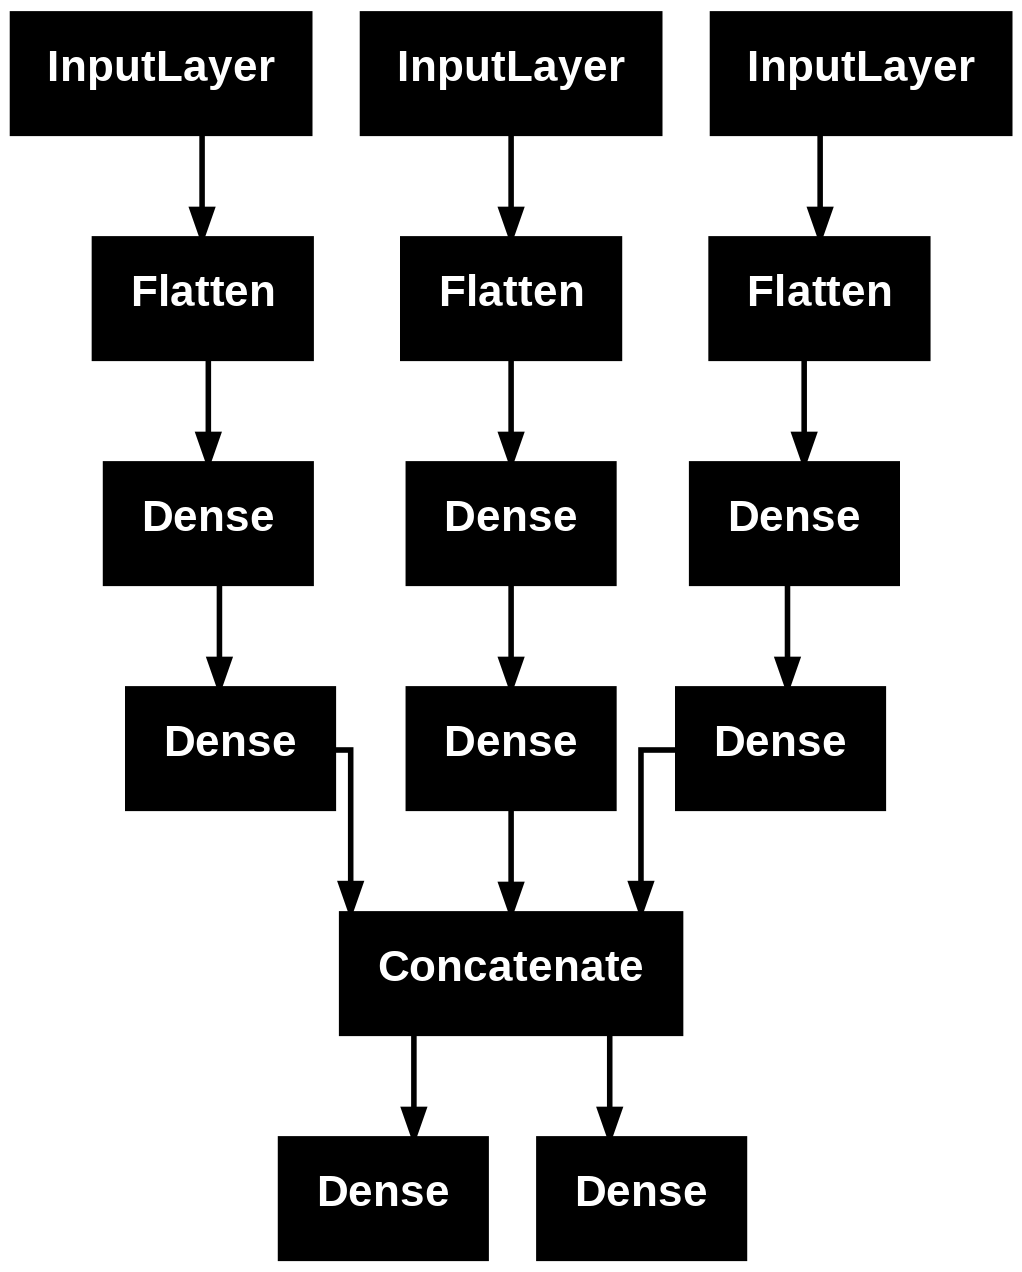

In [ ]:
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(300,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(100,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(100,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(50,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(25,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
model_fun2.summary()
tf.keras.utils.plot_model(model_fun2) #diagrama del modelo

In [ ]:
model_fun2.compile(loss=["sparse_categorical_crossentropy","binary_crossentropy"], #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall,

In [ ]:
history_ = model_fun2.fit(inputs_train, [y_train, ytrain_B], epochs = 20, batch_size = 64, validation_data = (inputs_valid, [y_valid, yvalid_B]))

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.6825 - output_d_accuracy: 0.8626 - output_d_loss: 0.4579 - output_p_accuracy: 0.9093 - output_p_loss: 0.2247 - val_loss: 0.2189 - val_output_d_accuracy: 0.9544 - val_output_d_loss: 0.1521 - val_output_p_accuracy: 0.9778 - val_output_p_loss: 0.0649
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.2155 - output_d_accuracy: 0.9567 - output_d_loss: 0.1453 - output_p_accuracy: 0.9771 - output_p_loss: 0.0702 - val_loss: 0.1600 - val_output_d_accuracy: 0.9684 - val_output_d_loss: 0.1097 - val_output_p_accuracy: 0.9814 - val_output_p_loss: 0.0487
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.1373 - output_d_accuracy: 0.9719 - output_d_loss: 0.0920 - output_p_accuracy: 0.9847 - output_p_loss: 0.0454 - val_loss: 0.1320 - val_output_d_accuracy: 0.9724 - val_output_d_loss: 0.0951 - val_output_p_accuracy: 0.9880 - val_output_p_loss: 0.0357
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0

In [ ]:
ytestA,ytestB = model_fun2.predict(inputs_test)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10) (10000, 10)


In [ ]:
print(ytestA[0].argmax(),y_test[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

7 7


In [ ]:
print(ytestB[0],ytest_B[0])

[1.] 1


In [ ]:
scoreB = model_fun2.evaluate(inputs_test,[y_test,ytest_B])#evaluacion
print(scoreB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1607 - output_d_accuracy: 0.9772 - output_d_loss: 0.1081 - output_p_accuracy: 0.9888 - output_p_loss: 0.0527
[0.148605078458786, 0.09737779945135117, 0.050992999225854874, 0.9789000153541565, 0.9889000058174133]
